In [1]:
import pandas as pd
import numpy as np

### Import datasets

In [2]:
folder_path = "dataset/"
train_x_file = "AMF_train_X_XCZw8r3.csv"
train_y_file = "AMF_train_Y_omYQJZL.csv"
test_x_file = "AMF_test_X_uDs0jHH.csv"
train_X = pd.read_csv(folder_path + train_x_file)
train_y = pd.read_csv(folder_path + train_y_file)
test_X = pd.read_csv(folder_path + test_x_file)

### Merge train data X and y

In [3]:
train_df = train_X.merge(train_y, on='Trader')

### Some visualization

In [4]:
train_df.head(5)

Index    Share      Day     Trader       OTR        OCR         OMR  \
0      1   Isin_8  Date_24  Trader_10  2.272727   8.333333   12.500000   
1      2  Isin_87  Date_29  Trader_10  1.696629  25.166667   21.571429   
2      3  Isin_87  Date_23  Trader_10  1.482759  47.300000  118.250000   
3      4  Isin_12  Date_11  Trader_10  1.705882  14.500000   29.000000   
4      5  Isin_87   Date_9  Trader_10  1.517730  26.750000         NaN   

   min_time_two_events  mean_time_two_events  10_p_time_two_events  ...  \
0                  0.0           5117.830300              0.000000  ...   
1                  0.0           1846.968401              0.000074  ...   
2                  0.0            686.300630              0.000071  ...   
3                  0.0           2174.335265              0.000000  ...   
4                  0.0            944.008551              0.000071  ...   

   mean_dt_TV1_TV2  med_dt_TV1_TV2  min_dt_TV1_TV3  mean_dt_TV1_TV3  \
0              NaN             NaN             NaN              NaN   
1              NaN             NaN             NaN              NaN   
2              NaN             NaN             NaN              NaN   
3              NaN             NaN             NaN              NaN   
4              NaN             NaN             NaN              NaN   

   med_dt_TV1_TV3  min_dt_TV1_TV4  mean_dt_TV1_TV4  med_dt_TV1_TV4  \
0             NaN             NaN              NaN             NaN   
1             NaN             NaN              NaN             NaN   
2             NaN             NaN              NaN             NaN   
3             NaN             NaN              NaN             NaN   
4             NaN             NaN              NaN             NaN   

   NbSecondWithAtLeatOneTrade     type  
0                           4  NON HFT  
1                          15  NON HFT  
2                          63  NON HFT  
3                           4  NON HFT  
4                          38  NON HFT  

[5 rows x 40 columns]

In [5]:
train_df.info(), train_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105782 entries, 0 to 105781
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Index                       105782 non-null  int64  
 1   Share                       105782 non-null  object 
 2   Day                         105782 non-null  object 
 3   Trader                      105782 non-null  object 
 4   OTR                         104099 non-null  float64
 5   OCR                         105782 non-null  float64
 6   OMR                         58170 non-null   float64
 7   min_time_two_events         105782 non-null  float64
 8   mean_time_two_events        105782 non-null  float64
 9   10_p_time_two_events        105782 non-null  float64
 10  med_time_two_events         105782 non-null  float64
 11  25_p_time_two_events        105782 non-null  float64
 12  75_p_time_two_events        105782 non-null  float64
 13  90_p_time_two_

(None, (105782, 40))

In [6]:
np.unique(train_df['type'], return_counts=True)

(array(['HFT', 'MIX', 'NON HFT'], dtype=object), array([31950, 51483, 22349]))

### Exploring some ways of filling the missing values

In [7]:
# Creating a df with True if the value was null, False otherwise

df_dict = {'Trader' : train_X['Trader'].values}
for col in list(train_X.columns)[4:]:
    df_dict[col] = train_X[col].isnull()

nans_df = pd.DataFrame(df_dict)

# Getting the fraction of null rows per column for each Trader

traders_nans = nans_df.groupby('Trader').apply(lambda X: X.sum()/X.count())

In [8]:
traders_nans

OTR  OCR       OMR  min_time_two_events  \
Trader                                                     
Trader_10   0.000000  0.0  0.272727                  0.0   
Trader_105  0.000000  0.0  0.979532                  0.0   
Trader_107  0.000545  0.0  0.721133                  0.0   
Trader_110  0.000000  0.0  1.000000                  0.0   
Trader_114  0.010825  0.0  0.999098                  0.0   
...              ...  ...       ...                  ...   
Trader_51   0.000000  0.0  0.524476                  0.0   
Trader_54   0.003448  0.0  0.168966                  0.0   
Trader_57   0.000000  0.0  0.538462                  0.0   
Trader_59   0.000000  0.0  0.600000                  0.0   
Trader_60   0.000000  0.0  1.000000                  0.0   

            mean_time_two_events  10_p_time_two_events  med_time_two_events  \
Trader                                                                        
Trader_10                    0.0                   0.0                  0.0   
Trader_105                   0.0                   0.0                  0.0   
Trader_107                   0.0                   0.0                  0.0   
Trader_110                   0.0                   0.0                  0.0   
Trader_114                   0.0                   0.0                  0.0   
...                          ...                   ...                  ...   
Trader_51                    0.0                   0.0                  0.0   
Trader_54                    0.0                   0.0                  0.0   
Trader_57                    0.0                   0.0                  0.0   
Trader_59                    0.0                   0.0                  0.0   
Trader_60                    0.0                   0.0                  0.0   

            25_p_time_two_events  75_p_time_two_events  90_p_time_two_events  \
Trader                                                                         
Trader_10                    0.0                   0.0                   0.0   
Trader_105                   0.0                   0.0                   0.0   
Trader_107                   0.0                   0.0                   0.0   
Trader_110                   0.0                   0.0                   0.0   
Trader_114                   0.0                   0.0                   0.0   
...                          ...                   ...                   ...   
Trader_51                    0.0                   0.0                   0.0   
Trader_54                    0.0                   0.0                   0.0   
Trader_57                    0.0                   0.0                   0.0   
Trader_59                    0.0                   0.0                   0.0   
Trader_60                    0.0                   0.0                   0.0   

            ...  min_dt_TV1_TV2  mean_dt_TV1_TV2  med_dt_TV1_TV2  \
Trader      ...                                                    
Trader_10   ...        0.987013         0.987013        0.987013   
Trader_105  ...        1.000000         1.000000        1.000000   
Trader_107  ...        0.480937         0.480937        0.480937   
Trader_110  ...        1.000000         1.000000        1.000000   
Trader_114  ...        0.054578         0.054578        0.054578   
...         ...             ...              ...             ...   
Trader_51   ...        1.000000         1.000000        1.000000   
Trader_54   ...        0.844828         0.844828        0.844828   
Trader_57   ...        1.000000         1.000000        1.000000   
Trader_59   ...        1.000000         1.000000        1.000000   
Trader_60   ...        1.000000         1.000000        1.000000   

            min_dt_TV1_TV3  mean_dt_TV1_TV3  med_dt_TV1_TV3  min_dt_TV1_TV4  \
Trader                                                                        
Trader_10         1.000000         1.000000        1.000000        1.000000   
Trader_105        1.000000         1.000000  

In [9]:
# Getting the number of 'empty Traders' (traders with 0 row filled) for each column

empty_traders = []
for col in list(traders_nans.columns):
    nb_empty_traders = 0
    for sparsity in traders_nans[col].values:
        if sparsity == 1:
            nb_empty_traders += 1
    empty_traders.append(nb_empty_traders)

Text(0.5, 1.0, 'Number of empty traders')

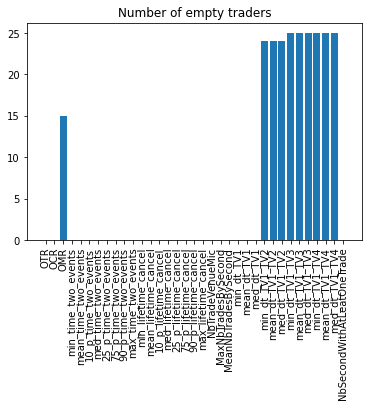

In [10]:
import matplotlib.pyplot as plt

plt.xticks(rotation='vertical')
plt.bar(list(train_X.columns)[4:], empty_traders)
plt.title('Number of empty traders')

In [11]:
# Computing the stats shown in the graph above

tot = 0
for col in range(len(empty_traders)):
    if empty_traders[col] != 0:
        tot += 1 
        print(list(train_X.columns)[4:][col] + ' : ' + str(round(empty_traders[col]/traders_nans.shape[0], 2)) + ' empty Traders')

print('')
print(str(tot) + ' columns concerned out of ' + str(len(empty_traders)))    

OMR : 0.17 empty Traders
min_dt_TV1_TV2 : 0.28 empty Traders
mean_dt_TV1_TV2 : 0.28 empty Traders
med_dt_TV1_TV2 : 0.28 empty Traders
min_dt_TV1_TV3 : 0.29 empty Traders
mean_dt_TV1_TV3 : 0.29 empty Traders
med_dt_TV1_TV3 : 0.29 empty Traders
min_dt_TV1_TV4 : 0.29 empty Traders
mean_dt_TV1_TV4 : 0.29 empty Traders
med_dt_TV1_TV4 : 0.29 empty Traders

10 columns concerned out of 35


In [12]:
# Checking if min_XX, mean_XX and med_XX are empty on the same rows

prefixes = ['min', 'mean', 'med']
suffixes = ['_dt_TV1_TV2', '_dt_TV1_TV3', '_dt_TV1_TV4']
for suf in suffixes:
    stat_columns = []
    for pref in prefixes:
        stat_columns.append(pref+suf)
    print(train_X[stat_columns].dropna(how='all').isna().sum())

min_dt_TV1_TV2     0
mean_dt_TV1_TV2    0
med_dt_TV1_TV2     0
dtype: int64
min_dt_TV1_TV3     0
mean_dt_TV1_TV3    0
med_dt_TV1_TV3     0
dtype: int64
min_dt_TV1_TV4     0
mean_dt_TV1_TV4    0
med_dt_TV1_TV4     0
dtype: int64


### Creating the objects and functions to fill nans in a more clever way

We fill following the following algortihm : 
1. If there are some rows for this trader, we fill with the mean computed for this trader alone
2. However, if all rows are empty for this trader, we fill with the overall mean over Traders (not lines, but Traders)

This means that our Imputer Object will have to store the overall means, as well as compute the local mean for each Trader when possible
    -> Here, fitting will mean computing the global means, and we will have to compute the local mean for each Trader in the transform method
    
To Do Later : 
We will add a column telling wether or not the Trader only had empty rows for OMR, as it seems like this holds information on the type of the Trader 

In [13]:
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator

class CustomImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        means_ = X.iloc[:,3:].groupby('Trader').mean().mean().values
        self.means = {}
        for ind,col in enumerate(X.columns.values[4:]):
            self.means[col] = means_[ind]
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_mean_ = X.iloc[:,3:].groupby('Trader').mean()
        
        # Filling the missing values in X_mean with global means
        X_mean_ = X_mean_.fillna(value=self.means)
        
        # Filling the missing values Trader by Trader
        for col in X.columns.values[4:]:
            for trader in X_mean_.index.values:
                X_[col][X_['Trader']==trader] = X_[col][X_['Trader']==trader].fillna(X_mean_.loc[trader, col])
        
        return X_

#### Checking if the class is working as intended

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [15]:
imputer_transformer = ColumnTransformer([
                                         ('test_imputer', CustomImputer(), train_X.columns.values)
                                        ])

scaler_transformer = ColumnTransformer([
                                         ('test_scaler', StandardScaler(), [i for i in range(4, 39)])
                                        ])

complete_test_preprocess = Pipeline([
                                     ('imputer_transformer', imputer_transformer),
                                     ('scaler_transformer', scaler_transformer)
])

In [16]:
prep_X = complete_test_preprocess.fit_transform(train_X)
prep_X

<ipython-input-13-ae4b4a211883>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[col][X_['Trader']==trader] = X_[col][X_['Trader']==trader].fillna(X_mean_.loc[trader, col])
<ipython-input-13-ae4b4a211883>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[col][X_['Trader']==trader] = X_[col][X_['Trader']==trader].fillna(X_mean_.loc[trader, col])
<ipython-input-13-ae4b4a211883>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[

array([[-0.23833642, -0.12701959, -0.2448338 , ...,  0.44457957,
         0.43755599, -0.5118286 ],
       [-0.24255705,  0.107288  , -0.23187053, ...,  0.44457957,
         0.43755599, -0.49476941],
       [-0.24412392,  0.41536768, -0.09371474, ...,  0.44457957,
         0.43755599, -0.4203293 ],
       ...,
       [-0.24658621,  0.95404315, -0.1135063 , ...,  0.44457957,
         0.43755599, -0.49321857],
       [-0.24634793,  2.59651615, -0.1135063 , ...,  0.44457957,
         0.43755599, -0.4637527 ],
       [-0.24635246,  0.67565789, -0.1135063 , ...,  0.44457957,
         0.43755599, -0.50407442]])